In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

### PCA on MNIST

In [4]:
ds = pd.read_csv("/home/yash/Desktop/Python/Data_Sets/MNIST/train.csv")
data = ds.values[:2000,1:]
y = ds.values[:2000,0]
print (np.unique(y,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([196, 217, 237, 173, 203, 187, 211, 194, 184, 198]))


In [5]:
print (data.shape,y.shape)

(2000, 784) (2000,)


In [7]:
A = np.cov(data.T)
print (A.shape)

(784, 784)


In [9]:
eig_val,eig_vec = np.linalg.eig(A)
print (eig_val.shape)

(784,)


In [10]:
eig_list = []
for ix in range(eig_val.shape[0]):
    temp = [eig_val[ix],eig_vec[ix]]
    eig_list.append(temp)
    
print (len(eig_list))

784


In [11]:
eig_list = sorted(eig_list, key=lambda x : x[0], reverse=True)

In [12]:
sorted_lamda = []
sorted_P = []

for ix in range(len(eig_list)):
    sorted_lamda.append(eig_list[ix][0])
    sorted_P.append(eig_list[ix][1])
    
sorted_lamda = np.asarray(sorted_lamda)
sorted_P = np.asarray(sorted_P)

/home/yash/.local/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


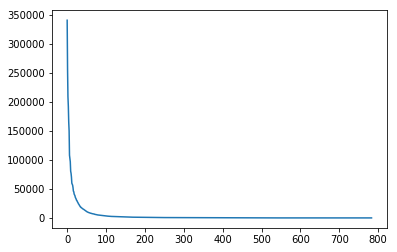

In [13]:
# plot of eigenvalues

plt.plot(sorted_lamda)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/yash/.local/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


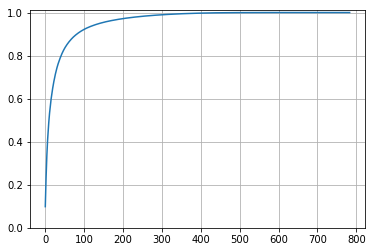

In [14]:
# explained variances
plt.figure(11)
plt.grid("on")
plt.ylim(0,1.01)
plt.plot(np.cumsum(sorted_lamda)/sorted_lamda.sum())
plt.show()

In [15]:
explained_variances = np.cumsum(sorted_lamda)/sorted_lamda.sum()
explained_variances[2]

(0.23249083093643033+0j)

In [17]:
Z = data.dot(sorted_P)
print (data.shape)

(2000, 784)


In [18]:
img_org = data[0].reshape((28,28))
img_reco = Z[0].astype(np.uint8).reshape((28,28))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


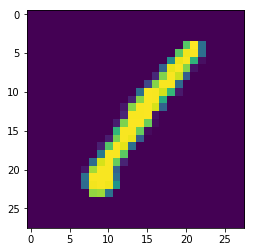

In [19]:
plt.imshow(img_org)

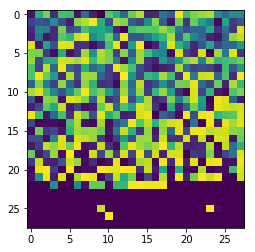

In [20]:
plt.imshow(img_reco)

In [21]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=2)

X_t = pca.fit_transform(data)
print (X_t.shape)

(2000, 2)


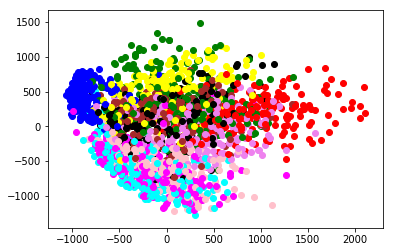

In [24]:
colors = ['red','blue','green','yellow','pink','black','violet','cyan','brown','magenta']
plt.figure()
for ix in range(X_t.shape[0]):
    plt.scatter(X_t[ix,0], X_t[ix,1], color= colors[y[ix]])
plt.show()